In [184]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Data Extraction

Importing the data from kaggle. The data is already split into test and train dataset. We shall use the training dataset to implement the machine learning models. The test data is where we shall use the trained model on the unseen data. 

In [133]:
train = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1541007358&Signature=CcB9dSTeE0vf%2BrikTpqB7pPf5IpSKLF4bGVZdcO29S4%2FOgpxW1bbiRjItOZOBJOPwYnXrGnwC0dNQjTptcyIeq7GVAYC7MDpAn6HoXS6p9TIIQudvHo5kKiDNvj4YOEGOQ5oZtYhEQc4dCjuIwlV4b%2BSNFZRn9E8dcxjXTF%2Bjqw%2BKfIb98sUYbE8fE%2BdTDO5G4S5KiSb0zHSbnYkgDlmSG2Hb7pDJ%2ByfZz321fe9QJ7DOykiUBqQ2NqyJU%2FF8BzRa6yPr3bv6CqLNm6PfvSseXl%2B1HXir6%2F5Z1I4MQJNtYkwCUQIp9GAfliqE0HuS8xtBmzHFFQIFJcwP9maVtMaxA%3D%3D')
test = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1541008156&Signature=VbrTuh0r%2Bk9MjE7c%2FveS28yi5uVTk1S8LOlS1lTR8QXZbDQPFYHOnR8NNDFod%2FTP2zS6tM%2FQ5%2F%2FU0R%2Fn%2B7wolz0AvClBAsJAGMkppgz3yPI15otNKZcGXg16ABFZISRhT4Kq6Gm3a1uBg2dA6Uhx7VJrfVAZLeB2HqwfCXiClrGBkDhYoKJZGjGg4w9o6Ru1Zd9yO6db0ALggDu1uIXn%2F2BQJ1SMFlPukTbRsuGQFUYir%2BvVVJZ8gNQcis2GHt0WCm%2BG8HYjDx1FLTofN%2FzwQqw6ZdLSGMd7AZJuAwmL7YzahJfWs0%2FJfefAvqBSdpr8MdPJAnsbS9w4S0awt7EYYg%3D%3D')
full_data = pd.concat([train, test])

C:\Users\nraj0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


# Data Information
We shall see the statistics of the data here

In [134]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


In [135]:
print(len(full_data))

1309


# Data Cleaning

In [136]:
full_data["Title"] = full_data['Name'].str.replace(",", ".")
full_data["Title"] = full_data["Title"].str.split(".").str.get(1)
# Remove redundent white space in this column
full_data['Title'] = full_data['Title'].str.strip(" ")

# full_data['Name'].str.split(" ").str.get(1).value_counts()

In [137]:
print(full_data.head())
print(full_data.info())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket Title  
0       3    male      1       0.0         A/5 21171    Mr  
1       1  female      1       1.0          PC 17599   Mrs  
2       3  female      0       1.0  STON/O2. 3101282  Miss  
3       1  female      1       1.0            113803   Mrs  
4       3    male      0   

In [138]:
by_sex = full_data.groupby(["Sex", "Title"]).size()

In [139]:
print(by_sex)

Sex     Title       
female  Dona              1
        Dr                1
        Lady              1
        Miss            260
        Mlle              2
        Mme               1
        Mrs             197
        Ms                2
        the Countess      1
male    Capt              1
        Col               4
        Don               1
        Dr                7
        Jonkheer          1
        Major             2
        Master           61
        Mr              757
        Rev               8
        Sir               1
dtype: int64


In [140]:
# Titles with very low cell counts to be combined to "rare" level
rare_list = ['Dona', 'Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
rare_title = full_data["Title"].isin(rare_list)
full_data.Title[rare_title] = "Rare Title"

# Also reassign mlle, ms, and mme accordingly
Mlle = full_data["Title"] == "Mlle"
Ms = full_data["Title"] == "Ms"
full_data.Title[Mlle | Ms] = "Miss"
Mme = full_data["Title"] == "Mme"
full_data.Title[Mme] = "Mrs"

C:\Users\nraj0\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\nraj0\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\nraj0\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [141]:
by_sex = full_data.groupby(["Sex", "Title"]).size()

In [142]:
# Show title counts by sex again
print(by_sex)

Sex     Title     
female  Miss          264
        Mrs           198
        Rare Title      4
male    Master         61
        Mr            757
        Rare Title     25
dtype: int64


In [143]:
full_data["Surname"] = full_data['Name'].str.replace(",", ".")
full_data["Surname"] = full_data["Surname"].str.split(".").str.get(2)
# Remove redundent white space in this column
full_data['Surname'] = full_data['Surname'].str.strip(" ")
full_data["Surname"] = full_data["Surname"].str.split(" ").str.get(0)
full_data['Surname'] = full_data['Surname'].str.strip("( | )")

In [144]:
print(full_data["Surname"].value_counts())

William      66
John         56
Charles      28
George       27
Thomas       26
James        22
Henry        20
Joseph       19
Edward       18
Frederick    16
Samuel       14
Johan        14
Alfred       13
Mary         13
Karl         13
Richard      12
Albert       12
Arthur       12
Patrick      11
Alexander    11
Frank        10
Walter       10
Elizabeth    10
Ernest        9
Robert        9
Anna          9
Harry         8
Alice         7
Benjamin      7
Ellen         7
             ..
Sigvard       1
Said          1
Grace         1
Alden         1
Gertrude      1
Boulton       1
Meier         1
Houssein      1
Nathan        1
Gerda         1
Liudevit      1
Serafino      1
Mitto         1
Mirko         1
Mohamed       1
Leon          1
Winifred      1
Olaus         1
Aurora        1
Kanio         1
Virginia      1
Nellie        1
Ramon         1
Ole           1
Branko        1
Robina        1
Selena        1
Karen         1
Austen        1
Mathilde      1
Name: Surname, Length: 5

In [145]:
print(full_data[full_data["Surname"]=="William"])

      Age    Cabin Embarked      Fare  \
4    35.0      NaN        S    8.0500   
12   20.0      NaN        S    8.0500   
23   28.0       A6        S   35.5000   
31    NaN      B78        C  146.5208   
41   27.0      NaN        S   21.0000   
45    NaN      NaN        S    8.0500   
59   11.0      NaN        S   46.9000   
86   16.0      NaN        S   34.3750   
97   23.0  D10 D12        C   63.3583   
117  29.0      NaN        S   21.0000   
167  45.0      NaN        S   27.9000   
191  19.0      NaN        S   13.0000   
226  19.0      NaN        S   10.5000   
245  44.0      C78        Q   90.0000   
247  24.0      NaN        S   14.5000   
252  62.0      C87        S   26.5500   
253  30.0      NaN        S   16.1000   
263  40.0      B94        S    0.0000   
268  58.0     C125        S  153.4625   
271  25.0      NaN        S    0.0000   
302  19.0      NaN        S    0.0000   
312  26.0      NaN        S   26.0000   
348   3.0      NaN        S   15.9000   
372  19.0      N

In [146]:
print(full_data["Surname"].nunique())

536


In [147]:
full_data["Fsize"] = full_data["SibSp"] + full_data["Parch"] + 1

In [148]:
print(full_data["Fsize"])

0      2
1      2
2      1
3      2
4      1
5      1
6      1
7      5
8      3
9      2
10     3
11     1
12     1
13     7
14     1
15     1
16     6
17     1
18     2
19     1
20     1
21     1
22     1
23     1
24     5
25     7
26     1
27     6
28     1
29     1
      ..
388    1
389    5
390    1
391    2
392    3
393    1
394    5
395    2
396    1
397    3
398    1
399    1
400    1
401    2
402    2
403    1
404    2
405    1
406    2
407    3
408    1
409    3
410    1
411    2
412    1
413    1
414    1
415    1
416    1
417    3
Name: Fsize, Length: 1309, dtype: int64


In [150]:
full_data["Family"] = full_data.apply(lambda row: row["Surname"] + "_" + str(row["Fsize"]), axis = 1)

In [151]:
full_data["Family"]

0            Owen_2
1            John_2
2           Laina_1
3         Jacques_2
4         William_1
5           James_1
6         Timothy_1
7           Gosta_5
8           Oscar_3
9        Nicholas_2
10     Marguerite_3
11      Elizabeth_1
12        William_1
13         Anders_7
14          Hulda_1
15           Mary_1
16         Eugene_6
17        Charles_1
18         Julius_2
19         Fatima_1
20         Joseph_1
21       Lawrence_1
22           Anna_1
23        William_1
24        Torborg_5
25           Carl_7
26         Farred_1
27        Charles_6
28          Ellen_1
29          Lalio_1
           ...     
388       Patrick_1
389          Paul_5
390        Vivian_1
391        Ernest_2
392        Eugene_3
393       William_1
394         Anton_5
395        Lucien_2
396       Patrick_1
397    Maxmillian_3
398        Edvard_1
399        Thomas_1
400      Caroline_1
401         Harry_2
402       Dorothy_2
403          Jose_1
404         Isaac_2
405        Alfred_1
406       William_2


# Data Visualization

Using seaborn to visualize the relationship between family size & survival

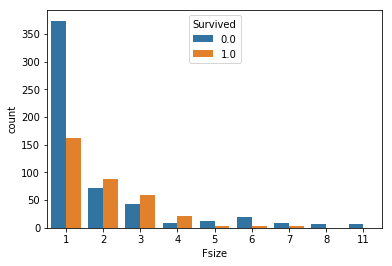

In [149]:
import seaborn as sns
sns.countplot(data = full_data,
            x="Fsize",
            hue = "Survived"
           )

We can thus conclude that there’s a survival penalty to singletons and those with family sizes above 4

In [152]:
singleton = full_data["Fsize"] == 1
small = (full_data["Fsize"] < 5) & (full_data["Fsize"] > 1)
large = full_data["Fsize"] > 4
def FsizeD_method(row):
    if row['Fsize'] == 1:
        return 'singleton'
    if (row['Fsize'] < 5) & (row['Fsize'] > 1):
        return 'small'
    if row['Fsize'] > 4:
        return 'large'
full_data['FsizeD'] = full_data.apply(lambda row: FsizeD_method(row), axis = 1)

In [153]:
print(full_data["FsizeD"])

0          small
1          small
2      singleton
3          small
4      singleton
5      singleton
6      singleton
7          large
8          small
9          small
10         small
11     singleton
12     singleton
13         large
14     singleton
15     singleton
16         large
17     singleton
18         small
19     singleton
20     singleton
21     singleton
22     singleton
23     singleton
24         large
25         large
26     singleton
27         large
28     singleton
29     singleton
         ...    
388    singleton
389        large
390    singleton
391        small
392        small
393    singleton
394        large
395        small
396    singleton
397        small
398    singleton
399    singleton
400    singleton
401        small
402        small
403    singleton
404        small
405    singleton
406        small
407        small
408    singleton
409        small
410    singleton
411        small
412    singleton
413    singleton
414    singleton
415    singlet

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('small', '0.0'),
               (0.0, 0.0, 0.3244768921336578, 0.4198334319391981)),
              (('small', '1.0'),
               (0.0,
                0.42315569107541073,
                0.3244768921336578,
                0.5768443089245892)),
              (('singleton', '0.0'),
               (0.3294273871831628,
                0.0,
                0.5967263393005967,
                0.6941479982924702)),
              (('singleton', '1.0'),
               (0.3294273871831628,
                0.6974702574286827,
                0.5967263393005967,
                0.30252974257131715)),
              (('large', '0.0'),
               (0.9311042215332644,
                0.0,
                0.06889577846673557,
                0.8359232665309184)),
              (('large', '1.0'),
               (0.9311042215332644,
                0.839245525667131,
                0.06889577846673557,
                0.16075447433286888))]))

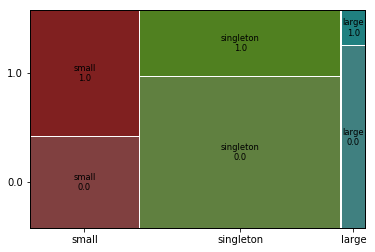

In [154]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(full_data, ['FsizeD', 'Survived'])

The above visualization shows that the survival rate is more with small families than large families

In [155]:
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Surname        1309 non-null object
Fsize          1309 non-null int64
Family         1309 non-null object
FsizeD         1309 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 224.1+ KB
None


In [25]:
print(full_data['Cabin'][:26])

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     D56
22     NaN
23      A6
24     NaN
25     NaN
Name: Cabin, dtype: object


In [156]:
full_data['Deck'] = full_data['Cabin']
full_data.Deck[full_data['Deck'].notna()] = full_data.Deck.astype(str).str[0]

C:\Users\nraj0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
full_data['Deck'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Deck, dtype: object

get the Deck number

In [158]:
print(full_data[full_data['Embarked'].isnull()])

      Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket Title  \
61       0           62       1  female      0       1.0  113572  Miss   
829      0          830       1  female      0       1.0  113572   Mrs   

    Surname  Fsize    Family     FsizeD Deck  
61   Amelie      1  Amelie_1  singleton    B  
829  George      1  George_1  singleton    B  


In [159]:
embarlk_fare = full_data.filter(['Embarked', 'Pclass', 'Fare'], axis = 1)

In [160]:
print(embarlk_fare)
embarlk_fare.dropna(subset = ['Embarked'])
print(full_data)

    Embarked  Pclass      Fare
0          S       3    7.2500
1          C       1   71.2833
2          S       3    7.9250
3          S       1   53.1000
4          S       3    8.0500
5          Q       3    8.4583
6          S       1   51.8625
7          S       3   21.0750
8          S       3   11.1333
9          C       2   30.0708
10         S       3   16.7000
11         S       1   26.5500
12         S       3    8.0500
13         S       3   31.2750
14         S       3    7.8542
15         S       2   16.0000
16         Q       3   29.1250
17         S       2   13.0000
18         S       3   18.0000
19         C       3    7.2250
20         S       2   26.0000
21         S       2   13.0000
22         Q       3    8.0292
23         S       1   35.5000
24         S       3   21.0750
25         S       3   31.3875
26         C       3    7.2250
27         S       1  263.0000
28         Q       3    7.8792
29         S       3    7.8958
..       ...     ...       ...
388     

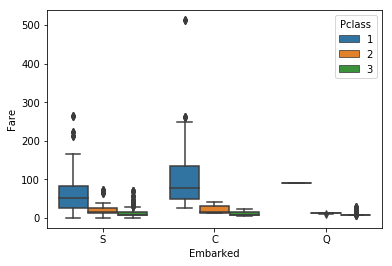

In [161]:
ax = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data = embarlk_fare)

In [162]:
print(full_data[full_data['Embarked'].isnull()])

      Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket Title  \
61       0           62       1  female      0       1.0  113572  Miss   
829      0          830       1  female      0       1.0  113572   Mrs   

    Surname  Fsize    Family     FsizeD Deck  
61   Amelie      1  Amelie_1  singleton    B  
829  George      1  George_1  singleton    B  


In [163]:
full_data['Embarked'][full_data['Embarked'].isnull()]  = 'C'

C:\Users\nraj0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
print(full_data[full_data['Embarked'].isnull()])

Empty DataFrame
Columns: [Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex, SibSp, Survived, Ticket, Title, Surname, Fsize, Family, FsizeD, Deck]
Index: []


In [165]:
full_data.iloc[1043]

Age                          60.5
Cabin                         NaN
Embarked                        S
Fare                          NaN
Name           Storey, Mr. Thomas
Parch                           0
PassengerId                  1044
Pclass                          3
Sex                          male
SibSp                           0
Survived                      NaN
Ticket                       3701
Title                          Mr
Surname                    Thomas
Fsize                           1
Family                   Thomas_1
FsizeD                  singleton
Deck                          NaN
Name: 152, dtype: object

In [166]:
Pclass_3 = full_data['Pclass'] == 3
Embarked_S = full_data['Embarked'] == 'S'
Pclass_3_Embarked_S = full_data[Pclass_3 & Embarked_S]

C:\Users\nraj0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\nraj0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


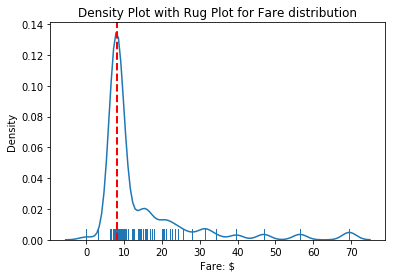

In [167]:
sns.distplot(Pclass_3_Embarked_S['Fare'], hist=False, kde = True, rug = True)
plt.title("Density Plot with Rug Plot for Fare distribution")
plt.xlabel('Fare: $')
plt.ylabel('Density')
plt.axvline(Pclass_3_Embarked_S['Fare'].median(), color='red', linestyle='dashed', linewidth=2)

We can see from the above graph that it is reasonable to replace the NA Fare value with median for their class and embarkment.

In [168]:
full_data['Fare'].iloc[1043] = Pclass_3_Embarked_S['Fare'].median()

C:\Users\nraj0\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [169]:
print(full_data['Fare'].iloc[1043])

8.05


In [ ]:
full_data['Age'].isna().sum()

In [ ]:
from fancyimpute import mice as MICE

In [173]:
full_data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Title           object
Surname         object
Fsize            int64
Family          object
FsizeD          object
Deck            object
dtype: object

In [174]:
full_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Fsize,Family,FsizeD,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,Owen,2,Owen_2,small,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,John,2,John_2,small,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,Laina,1,Laina_1,singleton,NaN
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,Jacques,2,Jacques_2,small,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,William,1,William_1,singleton,NaN


In [175]:
full_data.isna().sum()

Age             263
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck           1014
dtype: int64

In [176]:
full_data.Deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [177]:
factor_vars = full_data['Age']

In [178]:
full_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Surname',
       'Fsize', 'Family', 'FsizeD', 'Deck'],
      dtype='object')

In [179]:
cols = full_data.drop(columns={
    'Cabin', 'Survived','Deck'
})

In [180]:
cols.shape

(1309, 15)

In [181]:
full_data.shape

(1309, 18)

In [2]:
from fancyimpute import mice

ModuleNotFoundError: No module named 'fancyimpute'

In [ ]:
from fancyimpute import IterativeImputer

In [187]:
n_imputations = 5
XY_completed = []

In [ ]:
for i in range(n_imputations):
    imputer = IterativeImputer(n_iter=5, sample_posterior=True, random_state=i)

In [61]:
cols.dtypes

Age            float64
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Ticket          object
Title           object
Surname         object
Fsize            int64
Family          object
FsizeD          object
dtype: object

In [62]:
cols.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title,Surname,Fsize,Family,FsizeD
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,Mr,Owen,2,Owen_2,small
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,Mrs,John,2,John_2,small
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,Miss,Laina,1,Laina_1,singleton
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,Mrs,Jacques,2,Jacques_2,small
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,Mr,William,1,William_1,singleton


In [63]:
cols.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Ticket', 'Title', 'Surname', 'Fsize', 'Family',
       'FsizeD'],
      dtype='object')

In [64]:
XY_completed.append(imputer.fit_transform(cols.drop(columns={
    'Embarked','Name','Sex','Ticket', 'Title', 'Surname', 'Family',
       'FsizeD'
})))

XY_completed_mean = np.mean(XY_completed, 0)

In [65]:
XY_completed_mean.shape

(1309, 7)

In [66]:
xxx = cols.columns

In [67]:
xxx

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Ticket', 'Title', 'Surname', 'Fsize', 'Family',
       'FsizeD'],
      dtype='object')

In [68]:
xxx.drop({'Embarked','Name','Sex','Ticket', 'Title', 'Surname', 'Family',
       'FsizeD'
})

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Fsize'], dtype='object')

In [69]:
newdf = pd.DataFrame(data=XY_completed_mean,
                    columns = xxx.drop({    'Embarked','Name','Sex','Ticket', 'Title', 'Surname', 'Family',
       'FsizeD'
}),index = cols.index)
                                       

In [70]:
newdf.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Fsize
0,22.0,7.2500,0.0,1.0,3.0,1.0,2.0
1,38.0,71.2833,0.0,2.0,1.0,1.0,2.0
2,26.0,7.9250,0.0,3.0,3.0,0.0,1.0
3,35.0,53.1000,0.0,4.0,1.0,1.0,2.0
4,35.0,8.0500,0.0,5.0,3.0,0.0,1.0


In [71]:
newdf.isna().sum()

Age            0
Fare           0
Parch          0
PassengerId    0
Pclass         0
SibSp          0
Fsize          0
dtype: int64

In [72]:
cols.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            408, 409, 410, 411, 412, 413, 414, 415, 416, 417],
           dtype='int64', length=1309)

In [73]:
newdf.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            408, 409, 410, 411, 412, 413, 414, 415, 416, 417],
           dtype='int64', length=1309)

In [74]:
final_df = pd.merge(newdf,cols.drop(columns={'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Fsize'
}),on=cols.index,how='outer',indicator='Exists')

In [75]:
cols.Age = newdf.Age

In [76]:
cols.isna().sum()

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Ticket         0
Title          0
Surname        0
Fsize          0
Family         0
FsizeD         0
dtype: int64

In [77]:
cols.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title,Surname,Fsize,Family,FsizeD
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,Mr,Owen,2,Owen_2,small
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,Mrs,John,2,John_2,small
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,Miss,Laina,1,Laina_1,singleton
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,Mrs,Jacques,2,Jacques_2,small
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,Mr,William,1,William_1,singleton


In [78]:
newdf.shape

(1309, 7)

In [79]:
cols.shape

(1309, 15)

In [80]:
full_data.shape

(1309, 18)

In [81]:
full_data.isna().sum()

Age             263
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck           1014
dtype: int64

In [82]:
full_data['Age'] = cols['Age']

In [83]:
full_data.isna().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
Surname           0
Fsize             0
Family            0
FsizeD            0
Deck           1014
dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


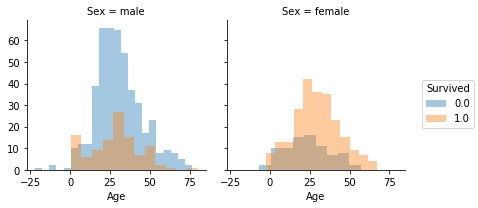

In [84]:
g = sns.FacetGrid(full_data, col="Sex",hue="Survived",margin_titles=True)
g.map(sns.distplot, "Age", kde = False);
g.add_legend();

In [85]:
full_data['Child'] = full_data['Age']
Child = full_data['Child'] < 18
Adult = full_data['Child'] >= 18
full_data['Child'][Child] = 1
full_data['Child'][Adult] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [86]:
full_data['Child'].value_counts()

0.0    1087
1.0     222
Name: Child, dtype: int64

In [87]:
full_data['Mother'] = 0
is_Parch_0 = full_data['Parch'] > 0
is_Age_18 = full_data['Age'] > 18
is_Miss = full_data['Title'] != 'Miss'
full_data['Mother'][is_Parch_0 & is_Age_18 & is_Miss] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [88]:
full_data['Mother'].value_counts()

0    1164
1     145
Name: Mother, dtype: int64

In [89]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 20 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Surname        1309 non-null object
Fsize          1309 non-null int64
Family         1309 non-null object
FsizeD         1309 non-null object
Deck           295 non-null object
Child          1309 non-null float64
Mother         1309 non-null int64
dtypes: float64(4), int64(6), object(10)
memory usage: 254.8+ KB


In [90]:
possible_variable = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title", "FsizeD", "Child", "Mother"]

In [91]:
full_data["Survived"] = full_data["Survived"].astype('category')
full_data[possible_variable] = full_data[possible_variable].astype('category')
full_data[possible_variable].dtypes
full_data['FsizeD'].dtypes
full_data['Sex'].dtypes

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [92]:
full_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,Owen,2,Owen_2,small,NaN,0.0,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,John,2,John_2,small,C,0.0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,Laina,1,Laina_1,singleton,NaN,0.0,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,Jacques,2,Jacques_2,small,C,0.0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,William,1,William_1,singleton,NaN,0.0,0


In [93]:
full_data.describe()

,PassengerId,Fsize
count,1309.000000,1309.000000
mean,655.000000,1.883881
std,378.020061,1.583639
min,1.000000,1.000000
25%,328.000000,1.000000
50%,655.000000,1.000000
75%,982.000000,2.000000
max,1309.000000,11.000000


In [94]:
full_data.dtypes

Age            category
Cabin            object
Embarked       category
Fare           category
Name             object
Parch          category
PassengerId       int64
Pclass         category
Sex            category
SibSp          category
Survived       category
Ticket           object
Title          category
Surname          object
Fsize             int64
Family           object
FsizeD         category
Deck             object
Child          category
Mother         category
dtype: object

Prepare the data and split it

In [98]:
dumDF = full_data.copy(deep=True)
dumCols = ['Sex','Embarked','Title','FsizeD']

dummy_df = pd.get_dummies(full_data[dumCols])
filteredDF = pd.concat([dumDF, dummy_df], axis=1)
filteredDF = filteredDF.drop(dumCols, axis=1)

In [99]:
filteredDF.columns

Index(['Age', 'Cabin', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'SibSp', 'Survived', 'Ticket', 'Surname', 'Fsize', 'Family', 'Deck',
       'Child', 'Mother', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare Title', 'FsizeD_large', 'FsizeD_singleton', 'FsizeD_small'],
      dtype='object')

In [101]:
poss_vars = ["Pclass",  "Age", "SibSp", "Parch", "Fare", "Child", "Mother",'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare Title', 'FsizeD_large', 'FsizeD_singleton', 'FsizeD_small']

In [105]:
filteredDF.fillna(method='bfill',inplace=True)

In [116]:
filteredDF.Survived.fillna(method='ffill',inplace=True)

In [117]:
filteredDF.isna().sum()

Age                 0
Cabin               3
Fare                0
Name                0
Parch               0
PassengerId         0
Pclass              0
SibSp               0
Survived            0
Ticket              0
Surname             0
Fsize               0
Family              0
Deck                3
Child               0
Mother              0
Sex_female          0
Sex_male            0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Rare Title    0
FsizeD_large        0
FsizeD_singleton    0
FsizeD_small        0
dtype: int64

In [118]:
filteredDF.dropna(inplace=True)

In [119]:
# filteredDF.Survived = filteredDF.Survived.astype(int)

In [120]:
# filteredDF.Survived.dtypes

In [121]:
# filteredDF.Survived.fillna(filteredDF.Survived.median(),inplace=True)

In [122]:
from sklearn.model_selection import train_test_split
X = filteredDF[poss_vars]
y = filteredDF['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size = 0.41, random_state = 42) 


In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)